In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv('adult-train.csv')
test = pd.read_csv('adult-test.csv')

In [ ]:
#Make sure the data is loaded well
train.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,<=50K/>50K.
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
test.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,<=50K/>50K.
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    education       32561 non-null  object
 3    education-num   32561 non-null  int64 
 4    marital-status  32561 non-null  object
 5    occupation      32561 non-null  object
 6    relationship    32561 non-null  object
 7    race            32561 non-null  object
 8    sex             32561 non-null  object
 9    capital-gain    32561 non-null  int64 
 10   capital-loss    32561 non-null  int64 
 11   hours-per-week  32561 non-null  int64 
 12   native-country  32561 non-null  object
 13   <=50K/>50K.     32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              16281 non-null  int64 
 1    workclass       16281 non-null  object
 2    education       16281 non-null  object
 3    education-num   16281 non-null  int64 
 4    marital-status  16281 non-null  object
 5    occupation      16281 non-null  object
 6    relationship    16281 non-null  object
 7    race            16281 non-null  object
 8    sex             16281 non-null  object
 9    capital-gain    16281 non-null  int64 
 10   capital-loss    16281 non-null  int64 
 11   hours-per-week  16281 non-null  int64 
 12   native-country  16281 non-null  object
 13   <=50K/>50K.     16281 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.7+ MB


In [ ]:
#Looking for the missing value
train.replace(' ?',np.nan,inplace=True)
train.isnull().sum()

age                   0
 workclass         1836
 education            0
 education-num        0
 marital-status       0
 occupation        1843
 relationship         0
 race                 0
 sex                  0
 capital-gain         0
 capital-loss         0
 hours-per-week       0
 native-country     583
 <=50K/>50K.          0
dtype: int64

In [ ]:
#Imputing
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
result = imputer.fit_transform(train[[' workclass',' occupation',' native-country']])
train[[' workclass',' occupation',' native-country']] = result
train.isnull().sum()

age                0
 workclass         0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 <=50K/>50K.       0
dtype: int64

In [ ]:
target = train.pop(' <=50K/>50K.')
print(target)

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name:  <=50K/>50K., Length: 32561, dtype: object


In [ ]:
#Convert Categorical Values to their numerical representation
num_train = pd.get_dummies(data=train, columns=[' workclass',' education',' marital-status',' occupation',' relationship',' race',' sex',' native-country'])
print(num_train)
print(num_train.columns)

       age   education-num   capital-gain   capital-loss   hours-per-week  \
0       39              13           2174              0               40   
1       50              13              0              0               13   
2       38               9              0              0               40   
3       53               7              0              0               40   
4       28              13              0              0               40   
...    ...             ...            ...            ...              ...   
32556   27              12              0              0               38   
32557   40               9              0              0               40   
32558   58               9              0              0               40   
32559   22               9              0              0               20   
32560   52               9          15024              0               40   

        workclass_ Federal-gov   workclass_ Local-gov  \
0                 

In [ ]:
mapping = {' <=50K':0, ' >50K':1}
target = target.map(mapping)

In [ ]:
print(target)

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name:  <=50K/>50K., Length: 32561, dtype: int64


In [ ]:
# normalize numerical features through data scaling.
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
norm_train = min_max_scaler.fit_transform(num_train)

In [ ]:
print(norm_train)
print(norm_train.shape)

[[0.30136986 0.8        0.02174022 ... 1.         0.         0.        ]
 [0.45205479 0.8        0.         ... 1.         0.         0.        ]
 [0.28767123 0.53333333 0.         ... 1.         0.         0.        ]
 ...
 [0.56164384 0.53333333 0.         ... 1.         0.         0.        ]
 [0.06849315 0.53333333 0.         ... 1.         0.         0.        ]
 [0.47945205 0.53333333 0.1502415  ... 1.         0.         0.        ]]
(32561, 104)


Pre-processing
- Input normalisation: Normalise(rescale) features to lie on a sensible scale. Useful for network/model training, and for visual inspectation of data.
- Imputing: filling the missing data
- Feature construction and selection: Incorporate your domain knowledge to select features that are likely to be useful. Mindfully build features from the data based on visual inspection and consideration of the task to be done.
- Dimensionality reduction: use maths to efficiently reduce the number of dimensions. Define a few new variables that are combinations of the raw variables, and account for most of the variance.

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(norm_train,target, test_size=0.2)
print("x_train: ",x_train.shape)
print("x_val: ",x_val.shape)
print("y_train: ",y_train.shape)
print("y_val: ",y_val.shape)

x_train:  (26048, 104)
x_val:  (6513, 104)
y_train:  (26048,)
y_val:  (6513,)


In [ ]:
from sklearn.model_selection import train_test_split, cross_validate

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, Perceptron

In [ ]:
from tqdm import tqdm
models = {"RF": RandomForestClassifier(), 
          "SVC": SVC(),
          "LR": LogisticRegression(),
          "SLP": Perceptron(),
          "MLP": MLPClassifier(),
         }
for model_name, model in tqdm(models.items(), desc="Model fit", total=len(models)):
    model.fit(x_train, y_train)

Model fit:  40%|████      | 2/5 [00:53<01:32, 30.70s/it]/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
Model fit:  80%|████████  | 4/5 [00:54<00:10, 10.40s/it]/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
Model fit: 100%|██████████| 5/5 [01:42<00:00, 20.51s/it]


In [ ]:
#accuracy
accuracy=[]
from sklearn.metrics import accuracy_score
for model_name, model in models.items():
  pred = model.predict(x_val)
  acc = accuracy_score(y_val, pred)
  accuracy.append(acc)
  print(f"{model_name} / Training Accuracy: {acc}%")

RF / Training Accuracy: 0.8506064793489944%
SVC / Training Accuracy: 0.8398587440503608%
LR / Training Accuracy: 0.8489175495163519%
SLP / Training Accuracy: 0.8050053738676494%
MLP / Training Accuracy: 0.8475356978350991%


In [ ]:
#precision
precision=[]
from sklearn.metrics import precision_score
for model_name, model in models.items():
  pred = model.predict(x_val)
  prec = precision_score(y_val, pred)
  precision.append(prec)
  print(f"{model_name} / Training Precision: {prec}%")

RF / Training Precision: 0.7079970652971387%
SVC / Training Precision: 0.7212822796081924%
LR / Training Precision: 0.7188976377952756%
SLP / Training Precision: 0.8534031413612565%
MLP / Training Precision: 0.7269709543568464%


In [ ]:
#Recall
Recall=[]
from sklearn.metrics import recall_score
for model_name, model in models.items():
  recall = model.predict(x_val)
  recall = recall_score(y_val, recall)
  Recall.append(recall)
  print(f"{model_name} / Training Recall: {recall}")

RF / Training Recall: 0.6266233766233766
SVC / Training Recall: 0.525974025974026
LR / Training Recall: 0.5928571428571429
SLP / Training Recall: 0.21168831168831168
MLP / Training Recall: 0.5688311688311688


In [ ]:
#F1
F1=[]
from sklearn.metrics import f1_score
for model_name, model in models.items():
  f1 = model.predict(x_val)
  f1 = f1_score(y_val, f1)
  F1.append(f1)
  print(f"{model_name} / Training F1: {f1}")

RF / Training F1: 0.6648294867378574
SVC / Training F1: 0.6083364626361247
LR / Training F1: 0.6498220640569395
SLP / Training F1: 0.3392299687825182
MLP / Training F1: 0.6382513661202186


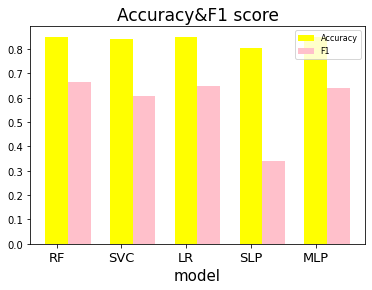

In [ ]:
#Graph it for easy to view
import matplotlib.pyplot as plt
label = ['RF','SVC','LR','SLP','MLP']
index = np.arange(len(label))
bar_width = 0.35
p1 = plt.bar(index, accuracy, bar_width, color='yellow',label='Accuracy')
p2 = plt.bar(index+bar_width, F1, bar_width, color='pink', label='F1')
plt.title('Accuracy&F1 score', fontsize=17)
plt.xlabel('model', fontsize=15)
plt.xticks(index, label, fontsize=13)
plt.legend((p1[0], p2[0]), ('Accuracy', 'F1'), fontsize=8)
plt.show()

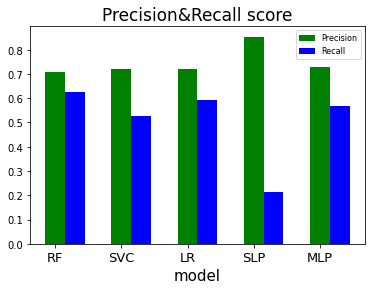

In [ ]:
label = ['RF','SVC','LR','SLP','MLP']
index = np.arange(len(label))
bar_width = 0.3
p1 = plt.bar(index, precision, bar_width, color='g',label='Precision')
p2 = plt.bar(index+bar_width, Recall, bar_width, color='b', label='Recall')
plt.title('Precision&Recall score', fontsize=17)
plt.xlabel('model', fontsize=15)
plt.xticks(index, label, fontsize=13)
plt.legend((p1[0], p2[0]), ('Precision', 'Recall'), fontsize=8)
plt.show()

In [ ]:
x_total = np.concatenate((x_train, x_val), axis=0)
y_total = np.concatenate((y_train, y_val), axis=0)

In [ ]:
#k-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
rf = RandomForestClassifier() # Create Model Object
for n in [3, 5]:
  kfold = KFold(n_splits=n)
  RFscores = cross_val_score(rf, x_total, y_total,scoring='accuracy', cv=kfold)
  print('n_splits={}, RandomForest cross validation score: {}'.format(n, RFscores.mean()))

n_splits=3, RandomForest cross validation score: 0.8461657164929708
n_splits=5, RandomForest cross validation score: 0.8455514127669816


In [ ]:
from sklearn.model_selection import cross_val_score
svc = SVC()
for n in [3, 5]:
  kfold = KFold(n_splits=n)
  SVCscores = cross_val_score(svc, x_total, y_total, scoring='accuracy', cv=kfold)
  print('n_splits={}, svc cross validation score: {}'.format(n, SVCscores.mean()))

n_splits=3, svc cross validation score: 0.8372593579928629
n_splits=5, svc cross validation score: 0.8372593124090131


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
lr = LogisticRegression(max_iter=500)
for n in [3, 5]:
  kfold = KFold(n_splits=n)
  LRscores = cross_val_score(lr, x_total, y_total, scoring='accuracy', cv=kfold)
  print('n_splits={}, LogisticRegression cross validation score: {}'.format(n, LRscores.mean()))

n_splits=3, LogisticRegression cross validation score: 0.8492675792886555
n_splits=5, LogisticRegression cross validation score: 0.8496974346525243


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
slp = Perceptron()
for n in [3, 5]:
  kfold = KFold(n_splits=n)
  Perceptronscores = cross_val_score(slp, x_total, y_total, scoring='accuracy', cv=kfold)
  print('n_splits={}, Perceptron cross validation score: {}'.format(n, Perceptronscores.mean()))

n_splits=3, Perceptron cross validation score: 0.7825934518567822
n_splits=5, Perceptron cross validation score: 0.7569463888326163


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
mlp = MLPClassifier()
for n in [3, 5]:
  kfold = KFold(n_splits=n)
  mlpscores = cross_val_score(mlp, x_total, y_total, cv=kfold)
  print('n_splits={}, MLP cross validation score: {}'.format(n, mlpscores.mean()))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_splits=3, MLP cross validation score: 0.8462579021900417


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_splits=5, MLP cross validation score: 0.8458279575794545


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(max_iter=500, solver='liblinear')
params = {'penalty':['l2', 'l1'],
         'C':[0.01, 0.1, 1, 5, 10]}
grid_lr = GridSearchCV(lr, param_grid=params, scoring='accuracy', cv=3)
grid_lr.fit(x_total, y_total)
print('Optimal Hyperparameters :{0}, Optimal Mean Accuracy :{1:.3f}'.format(grid_lr.best_params_,
                                                   grid_lr.best_score_))


Optimal Hyperparameters :{'C': 5, 'penalty': 'l1'}, Optimal Mean Accuracy :0.851


In [ ]:
pd.DataFrame(grid_lr.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.084342,0.012503,0.005006,0.001425,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.829832,0.831399,0.830738,0.830656,0.000642,9
1,0.217338,0.006374,0.004020,0.000292,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.822185,0.823936,0.822169,0.822763,0.000829,10
2,0.136000,0.004383,0.004629,0.000981,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.838769,0.838677,0.840413,0.839286,0.000797,8
3,1.171115,0.091477,0.004042,0.000303,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.849456,0.847798,0.852391,0.849882,0.001899,6
4,0.179892,0.011022,0.004283,0.000532,1,l2,"{'C': 1, 'penalty': 'l2'}",0.850101,0.847245,0.850456,0.849268,0.001437,7
5,8.809258,0.194611,0.005014,0.000572,1,l1,"{'C': 1, 'penalty': 'l1'}",0.851391,0.847522,0.852852,0.850588,0.002249,2
6,0.239667,0.016962,0.004619,0.001024,5,l2,"{'C': 5, 'penalty': 'l2'}",0.851299,0.847798,0.852207,0.850435,0.001901,4
7,5.433453,1.404891,0.004446,0.000095,5,l1,"{'C': 5, 'penalty': 'l1'}",0.850931,0.847706,0.853128,0.850588,0.002227,1
8,0.254360,0.005996,0.004961,0.000704,10,l2,"{'C': 10, 'penalty': 'l2'}",0.851299,0.847798,0.852115,0.850404,0.001872,5
9,3.460837,0.626818,0.005389,0.001909,10,l1,"{'C': 10, 'penalty': 'l1'}",0.850654,0.847706,0.853128,0.850496,0.002216,3


Test data preprocessing

In [ ]:
test_target = test.pop(' <=50K/>50K.')
print(test_target)

0         <=50K.
1         <=50K.
2          >50K.
3          >50K.
4         <=50K.
          ...   
16276     <=50K.
16277     <=50K.
16278     <=50K.
16279     <=50K.
16280      >50K.
Name:  <=50K/>50K., Length: 16281, dtype: object


In [ ]:
num_test = pd.get_dummies(data=test, columns=[' workclass',' education',' marital-status',' occupation',' relationship',' race',' sex',' native-country'])
print(num_test)
print(num_test.columns)

       age   education-num   capital-gain   capital-loss   hours-per-week  \
0       25               7              0              0               40   
1       38               9              0              0               50   
2       28              12              0              0               40   
3       44              10           7688              0               40   
4       18              10              0              0               30   
...    ...             ...            ...            ...              ...   
16276   39              13              0              0               36   
16277   64               9              0              0               40   
16278   38              13              0              0               50   
16279   44              13           5455              0               40   
16280   35              13              0              0               60   

        workclass_ ?   workclass_ Federal-gov   workclass_ Local-gov  \
0  

In [ ]:
mapping = {' <=50K.':0, ' >50K.':1}
test_target = test_target.map(mapping)

In [ ]:
remove = num_test.pop(' workclass_ ?')
remove2 = num_test.pop(' native-country_ Yugoslavia')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
norm_test = min_max_scaler.fit_transform(num_test)

In [ ]:
print(norm_test)

[[0.10958904 0.4        0.         ... 0.         1.         0.        ]
 [0.28767123 0.53333333 0.         ... 0.         1.         0.        ]
 [0.15068493 0.73333333 0.         ... 0.         1.         0.        ]
 ...
 [0.28767123 0.8        0.         ... 0.         1.         0.        ]
 [0.36986301 0.8        0.05455055 ... 0.         1.         0.        ]
 [0.24657534 0.8        0.         ... 0.         1.         0.        ]]


In [ ]:
import warnings
import numpy as np
warnings.simplefilter(action='ignore', category=FutureWarning)
print('x' in np.arange(5))   #returns False, without Warning

False


In [ ]:
from sklearn.metrics import accuracy_score
best_model =  LogisticRegression(C=5,penalty='l1',max_iter=500,solver='liblinear')
best_model.fit(x_total, y_total)

LogisticRegression(C=5, max_iter=500, penalty='l1', solver='liblinear')

In [ ]:
pred = model.predict(norm_test)
acc = accuracy_score(test_target, pred)
print(acc)

0.7871138136478103
